In [1]:
import numpy as np
from matplotlib import pyplot as plt

def todB(num):
    return 10*np.log10(num)
def toLinear(num):
    return 10**(num/10)

In [2]:
#-----------DATA
c_freq = 5e9
bandwidth = 40e6
wavelength = 3e8 / c_freq
tx_power = 10e-3
antenna_gain = 10**0.3

#noise
kBT = 1.38e-23 * bandwidth * 290



In [3]:
#-------------NEED AT LEAST QPSK? Hartleys law
#12dB min SNR
2 * 40 * np.log2(4) * 3/4

120.0

In [4]:
#---------LOSS THROUGH WALLS p.187
concreteLoss = 24.1
drywallLoss = 0.3 #two sheets of drywall per wall
def propagationLossExp(r, k = 2.7):
    return (4 * np.pi/wavelength)** 2 * r**k

def ITU_indoor_propagation(r, n=31, floors = 0):
    return toLinear(20 * np.log10(c_freq/1e6) - 28 + n * np.log10(r) + (16 * floors)) #NO FLOORS (+16 per floor)
     

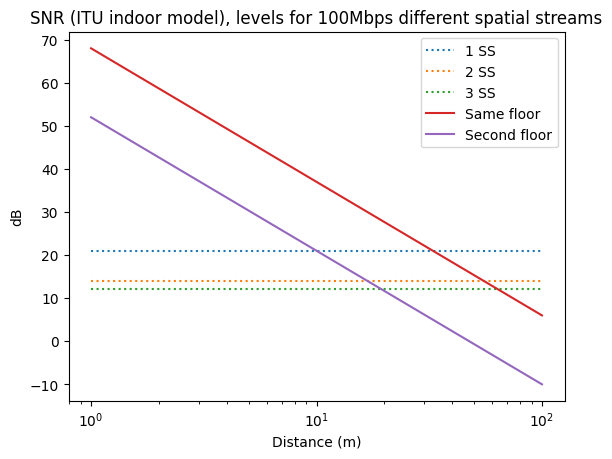

In [5]:
#-------------PLOT SNR
received_power_listSNR = []
received_power_list_drywallSNR = []
received_power_list_concreteSNR = []
received_power_list_second_floor = []

distance = 100

for i in range(1, distance + 1):
    received_power_listSNR.append(todB(tx_power * antenna_gain**2 / (ITU_indoor_propagation(i) * kBT)))
    received_power_list_drywallSNR.append(received_power_listSNR[i-1] - drywallLoss * 2)
    received_power_list_concreteSNR.append(received_power_listSNR[i-1] - concreteLoss)
    received_power_list_second_floor.append(todB(tx_power * antenna_gain**2 / (ITU_indoor_propagation(i, 31, 1) * kBT)))

plt.xscale('log')  
plt.title('SNR (ITU indoor model), levels for 100Mbps different spatial streams')
plt.ylabel('dB')
plt.xlabel('Distance (m)')
#limits 
#
#https://community.cisco.com/legacyfs/online/attachments/discussion/revolution-wi-fi-mcs-to-snr-single-page.pdf
#QAM256 = 27.5
#QAM64 = 20
QPSK = 12
QAM16 = 24
#plt.plot(range(1, 61), [QAM256 for x in range(0,60)], label='QAM256', linestyle='dotted')
#plt.plot(range(1, distance + 1), [QPSK for x in range(0,distance)], label='SNR limit QPSK 3/4 coding rate', linestyle='dotted')
spatial_stream1 = 21
spatial_stream2 = 14
spatial_stream3 = 12

plt.plot(range(1, distance+1), [spatial_stream1 for x in range(0,distance)], label='1 SS', linestyle='dotted')
plt.plot(range(1, distance+1), [spatial_stream2 for x in range(0,distance)], label='2 SS', linestyle='dotted')
plt.plot(range(1, distance+1), [spatial_stream3 for x in range(0,distance)], label='3 SS', linestyle='dotted')

#signals
plt.plot(range(1, distance + 1), received_power_listSNR, label='Same floor')
plt.plot(range(1, distance+1), received_power_list_second_floor, label='Second floor')
#plt.plot(range(1, distance + 1), received_power_list_drywallSNR, label='Drywall')
#plt.plot(range(1, distance + 1), received_power_list_concreteSNR, label='Concrete 102 mm')
plt.legend()

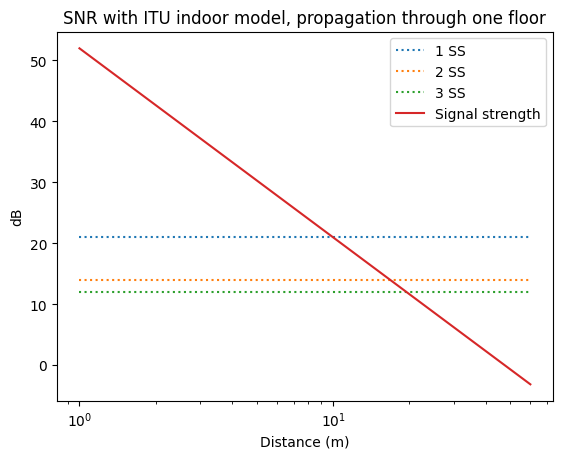

In [6]:
#From floor to floor
received_power_list_second_floor = []
for i in range(1, 61):
    received_power_list_second_floor.append(todB(tx_power * antenna_gain**2 / (ITU_indoor_propagation(i, 31, 1) * kBT)))
    

spatial_stream1 = 21
spatial_stream2 = 14
spatial_stream3 = 12

plt.plot(range(1, 61), [spatial_stream1 for x in range(0,60)], label='1 SS', linestyle='dotted')
plt.plot(range(1, 61), [spatial_stream2 for x in range(0,60)], label='2 SS', linestyle='dotted')
plt.plot(range(1, 61), [spatial_stream3 for x in range(0,60)], label='3 SS', linestyle='dotted')

plt.xscale('log')  
plt.title('SNR with ITU indoor model, propagation through one floor')
plt.ylabel('dB')
plt.xlabel('Distance (m)')
#signals
plt.plot(range(1, 61), received_power_list_second_floor, label='Signal strength')
plt.legend()

Text(0, 0.5, 'Power (dBm)')

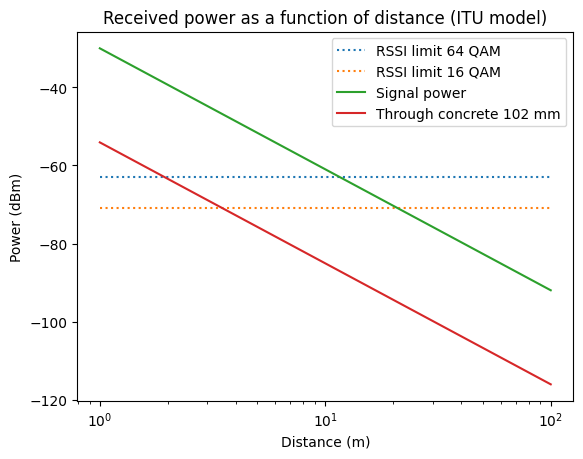

In [10]:
#-------------PLOT RECEIVED POWER
received_power_list = []
received_power_list_drywall = []
received_power_list_concrete = []

distance = 100

for i in range(1, distance + 1):
    received_power_list.append(todB(tx_power * antenna_gain**2 / (ITU_indoor_propagation(i)))+30)
    received_power_list_drywall.append(received_power_list[i-1] - drywallLoss * 2)
    received_power_list_concrete.append(received_power_list[i-1] - concreteLoss)

plt.plot(range(1, distance + 1), [-63 for x in range(0,distance)], label='RSSI limit 64 QAM', linestyle='dotted')
plt.plot(range(1, distance + 1), [-71 for x in range(0,distance)], label='RSSI limit 16 QAM', linestyle='dotted')
plt.plot(range(1, distance + 1), received_power_list, label='Signal power')
#plt.plot(range(1, distance + 1), received_power_list_drywall, label='Drywall')
plt.plot(range(1, distance + 1), received_power_list_concrete, label='Through concrete 102 mm')
plt.legend()
plt.xscale('log')
plt.title("Received power as a function of distance (ITU model)")
plt.xlabel("Distance (m)")
plt.ylabel("Power (dBm)")


In [8]:
160 * (3/4)
todB(tx_power * antenna_gain**2 / (ITU_indoor_propagation(10)))+30

-60.979400086720375

In [9]:
#population calculation case study 2
number_of_new_stations_sthlm = 50
cost_per_site = 110000
populations = {
"pop_sthlm": 1e6,
"pop_sthlm_outside_city" : 1.5e6,
"pop_gbg" : 6e5,
"pop_malmo" : 3.2e5,
"pop_uppsala" : 1.66e5,
"pop_vasteras" : 1.28e5,
"pop_orebro" : 1.26e5,
"pop_linkoping" : 1.15e5,
"pop_hbg" : 1.13e5,
"pop_jpkng" : 1e5,
}

total_pop = 0
new_sites_list = []
cost_list = []
for el in populations.values():
    sites = number_of_new_stations_sthlm * el/populations["pop_sthlm"]
    new_sites_list.append(sites)
    #print('relative size', el/populations["pop_sthlm"])
    total_pop += el
    cost_list.append(sites * cost_per_site)
print(new_sites_list)
print(sum(new_sites_list))
print('total cost', sum( new_sites_list) * 110000)
print(total_pop)
print(cost_list)

97_770_000 + 22924000

[50.0, 75.0, 30.0, 16.0, 8.3, 6.4, 6.3, 5.75, 5.65, 5.0]
208.40000000000003
total cost 22924000.000000004
4168000.0
[5500000.0, 8250000.0, 3300000.0, 1760000.0, 913000.0000000001, 704000.0, 693000.0, 632500.0, 621500.0, 550000.0]


120694000